# Fase 3: Preprocesamiento y Reducción de Dimensionalidad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Técnica PCA

In [3]:
df_ingresos = pd.read_csv('./income/datos_limpios.csv')
df_ingresos.head()

,edad,clase_de_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdidas_capital,horas_por_semana,pais_natal,ingreso,grupo_edad
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0,Tercera Edad
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0,Mediana Edad
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0,Mediana Edad
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,0,Adulto
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0,Adulto


In [ ]:
pca_model = PCA(n_components=2)

In [2]:
# Identificar columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=np.number).columns
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns

print("Columnas Numéricas:")
print(columnas_numericas)
print("\nColumnas Categóricas:")
print(columnas_categoricas)

Columnas Numéricas:
Index(['edad', 'peso_final', 'num_educacion', 'sexo', 'ganancia_capital',
       'perdidas_capital', 'horas_por_semana'],
      dtype='object')

Columnas Categóricas:
Index(['clase_de_trabajo', 'educacion', 'estado_civil', 'ocupacion',
       'relacion', 'raza', 'pais_natal', 'grupo_edad'],
      dtype='object')


In [3]:
# Crear el pipeline de preprocesamiento
# 1. Para variables numéricas: escalar con StandardScaler
# 2. Para variables categóricas: codificar con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), columnas_categoricas)
    ],
    remainder='passthrough' # Mantiene otras columnas si las hubiera
)

# Aplicar el preprocesamiento a los datos
X_processed = preprocessor.fit_transform(X)

# Obtener los nombres de las nuevas columnas codificadas
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(columnas_categoricas)
new_columns = list(columnas_numericas) + list(encoded_feature_names)

# Crear el DataFrame procesado
X_processed_df = pd.DataFrame(X_processed, columns=new_columns)

print("Datos preprocesados.")
print("Dimensiones de X_processed_df:", X_processed_df.shape)
X_processed_df.head()

Datos preprocesados.
Dimensiones de X_processed_df: (30162, 99)


,edad,peso_final,num_educacion,sexo,ganancia_capital,perdidas_capital,horas_por_semana,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,...,pais_natal_South,pais_natal_Taiwan,pais_natal_Thailand,pais_natal_Trinadad&Tobago,pais_natal_United-States,pais_natal_Vietnam,pais_natal_Yugoslavia,grupo_edad_Joven,grupo_edad_Mediana Edad,grupo_edad_Tercera Edad
0,3.316630,-0.538790,-0.439738,-1.443405,-0.147445,10.555814,-1.914161,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.184831,-0.467906,-2.400559,-1.443405,-0.147445,9.427915,-0.077734,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.195067,0.708645,-0.047574,-1.443405,-0.147445,9.427915,-0.077734,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.337883,0.256222,-0.439738,-1.443405,-0.147445,9.106365,0.339636,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.033340,-0.370964,-1.616231,0.692806,-0.147445,9.106365,-0.077734,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed_df)

print("Reducción de dimensionalidad con PCA completada.")
print("Dimensiones de X_pca:", X_pca.shape)

Reducción de dimensionalidad con PCA completada.
Dimensiones de X_pca: (30162, 2)


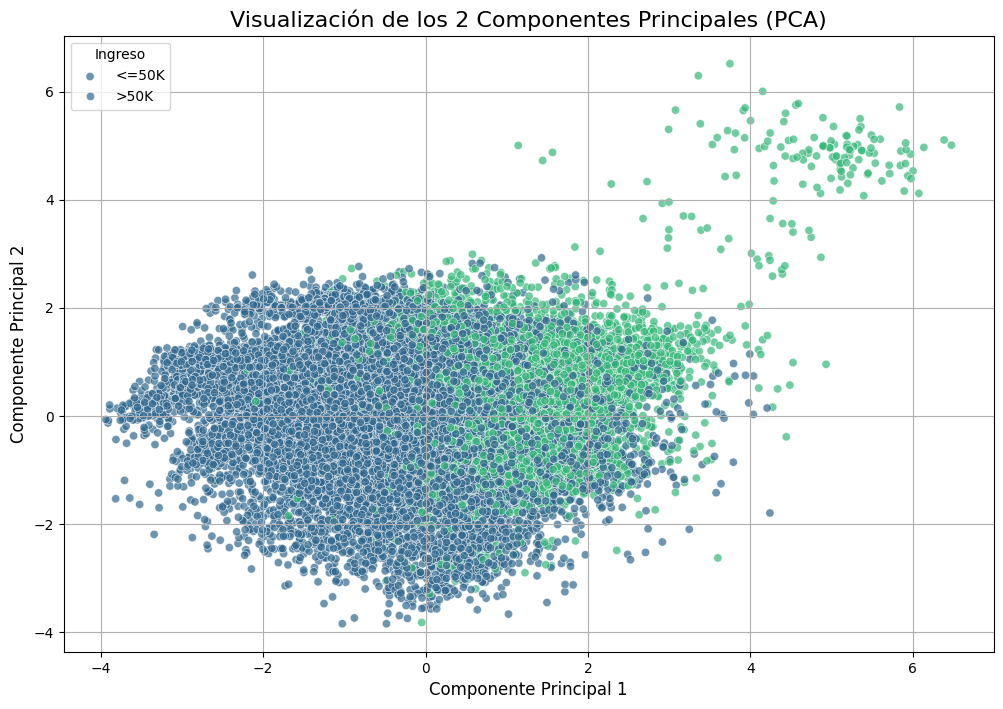

In [5]:
# Crear un DataFrame con los resultados de PCA para visualización
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['ingreso'] = y.values

# Visualizar los dos componentes principales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='ingreso', data=df_pca, palette='viridis', alpha=0.7)
plt.title('Visualización de los 2 Componentes Principales (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Ingreso', labels=['<=50K', '>50K'])
plt.grid(True)
plt.show()

Varianza explicada por PC1: 15.70%
Varianza explicada por PC2: 10.72%
Varianza total explicada por los 2 componentes: 26.42%


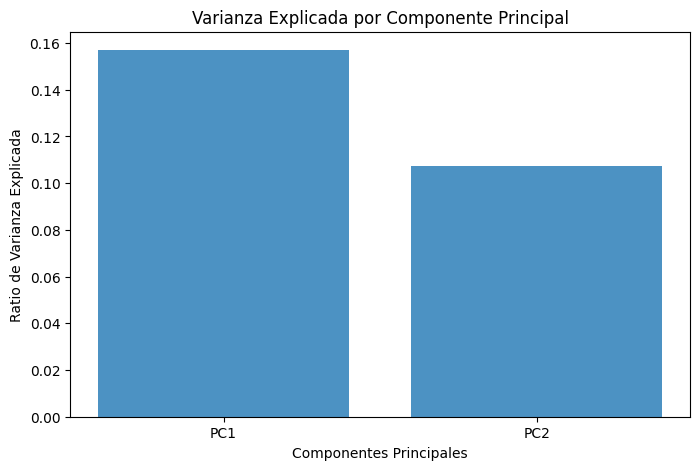

In [6]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

print(f"Varianza explicada por PC1: {explained_variance[0]:.2%}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2%}")
print(f"Varianza total explicada por los 2 componentes: {np.sum(explained_variance):.2%}")

# Gráfico de la varianza explicada
plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.8, align='center')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xticks(range(len(explained_variance)), ['PC1', 'PC2'])
plt.title('Varianza Explicada por Componente Principal')
plt.show()